In [1]:
import pandas as pd

file_path = "/Volumes/T7/External Downloads/nasdaq_exteral_data.csv"
top_stocks = ['AAPL']

filtered = pd.read_csv(file_path, usecols=['Date', 'Stock_symbol', 'Article_title'], chunksize=100_000)

rows = []
for chunk in filtered:
    chunk = chunk[chunk['Stock_symbol'].isin(top_stocks)]
    rows.append(chunk)

df_filtered = pd.concat(rows)


/var/folders/j5/tqvd0k7104s47pv13lpjvlnh0000gn/T/ipykernel_37365/2876516205.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in filtered:


In [ ]:
import pandas as pd

file_path = "/Volumes/T7/External Downloads/nasdaq_exteral_data.csv"
top_stocks = ['AAPL']

filtered = pd.read_csv(file_path, usecols=['Date', 'Stock_symbol', 'Article_title'], chunksize=100_000)

rows = []
for chunk in filtered:
    chunk = chunk[chunk['Stock_symbol'].isin(top_stocks)]
    rows.append(chunk)

df_filtered = pd.concat(rows)


In [3]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Date'].min(), df_filtered['Date'].max()


(Timestamp('2020-03-09 00:00:00+0000', tz='UTC'),
 Timestamp('2023-12-16 22:00:00+0000', tz='UTC'))

/var/folders/j5/tqvd0k7104s47pv13lpjvlnh0000gn/T/ipykernel_37365/474685230.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_filtered['month'] = df_filtered['Date'].dt.to_period('M')


<AxesSubplot:title={'center':'Articles per Year'}, xlabel='year'>

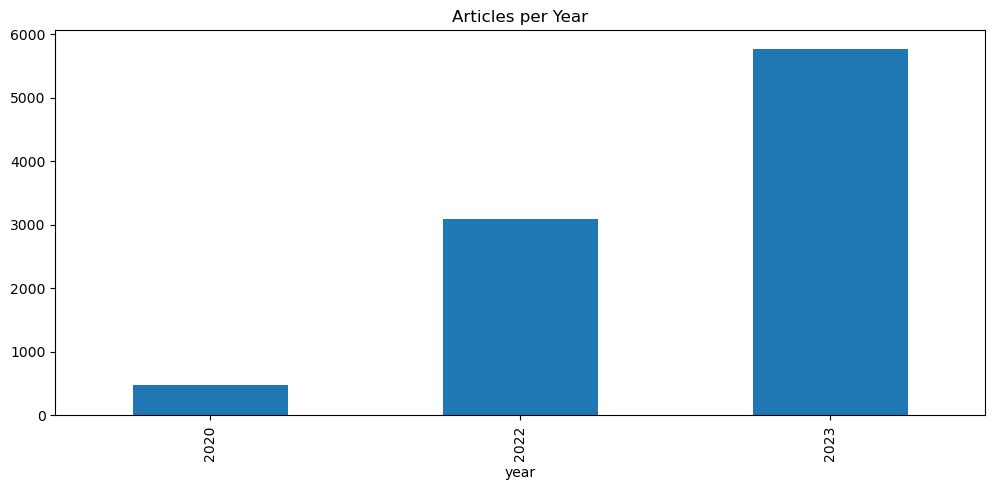

In [19]:
df_filtered['year'] = df_filtered['Date'].dt.year
df_filtered['month'] = df_filtered['Date'].dt.to_period('M')

df_filtered['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), title="Articles per Year")


In [20]:
df_filtered.head()

,Date,Article_title,Stock_symbol,year,month
12025,2023-12-16 22:00:00+00:00,My 6 Largest Portfolio Holdings Heading Into 2...,AAPL,2023,2023-12
12026,2023-12-16 22:00:00+00:00,Brokers Suggest Investing in Apple (AAPL): Rea...,AAPL,2023,2023-12
12027,2023-12-16 21:00:00+00:00,"Company News for Dec 19, 2023",AAPL,2023,2023-12
12028,2023-12-16 21:00:00+00:00,NVIDIA (NVDA) Up 243% YTD: Will It Carry Momen...,AAPL,2023,2023-12
12029,2023-12-16 21:00:00+00:00,"Pre-Market Most Active for Dec 19, 2023 : BMY,...",AAPL,2023,2023-12


In [5]:
raw_chunk = pd.read_csv(file_path, usecols=['Date', 'Stock_symbol', 'Article_title'], nrows=1_000_000)
raw_chunk['Date'] = pd.to_datetime(raw_chunk['Date'])

# Search for partial names
apple_hits = raw_chunk[raw_chunk['Article_title'].str.contains("Apple", case=False, na=False)]
apple_hits['Date'].min(), apple_hits['Date'].max()


(Timestamp('2009-12-09 00:00:00+0000', tz='UTC'),
 Timestamp('2024-01-04 00:00:00+0000', tz='UTC'))

In [21]:
print(apple_hits['Article_title'][258])

Zacks Investment Ideas feature highlights: Chevron, Kinder Morgan, Agilent Technologies, Apple and Microsoft
